# Day 54 – Image Data Augmentation

## What is Data Augmentation?

Data augmentation is a technique used to artificially increase the size and diversity of a dataset by applying random transformations to the training images. It is commonly used in computer vision to improve the generalization of deep learning models, especially when the available dataset is small or imbalanced.

## Why Use Data Augmentation?

- Prevents overfitting by introducing variability.
- Improves model robustness to unseen data.
- Reduces the need for collecting additional data.
- Enhances model generalization by simulating real-world variations.

## Common Image Augmentation Techniques

| Technique              | Description                                      |
|------------------------|--------------------------------------------------|
| Rotation               | Rotates the image by a certain angle.           |
| Horizontal Flip        | Flips the image along the vertical axis.        |
| Vertical Flip          | Flips the image along the horizontal axis.      |
| Zoom                   | Randomly zooms into the image.                  |
| Width/Height Shift     | Shifts the image along width and height.        |
| Shear                  | Applies affine transformation to slant the image.|
| Brightness Adjustment  | Changes the brightness of the image.            |
| Contrast Adjustment    | Changes the contrast levels of the image.       |
| Noise Addition         | Adds random noise like Gaussian or salt-pepper. |

## Libraries Commonly Used

- **TensorFlow/Keras**: `ImageDataGenerator`, `tf.image`
- **PyTorch**: `torchvision.transforms`
- **Albumentations**: Powerful and fast image augmentation library

## Use Case in Training

In most cases, augmentations are applied only on the **training set**, not on the **validation** or **test** sets. This ensures the model sees a diverse set of training examples while still being evaluated on consistent validation data.

## Advantages of Data Augmentation

- Simulates real-world variability in data.
- Makes models more robust to small changes in input.
- Helps reduce the gap between training and test accuracy.
- Can reduce the dependency on large datasets.

## When to Avoid or Limit Augmentation

- If the augmentation distorts the image in a way that it no longer resembles real-world data.
- Overuse of aggressive transformations can confuse the model.
- For tasks requiring exact spatial integrity (e.g., object detection), use spatially-aware augmentations.



In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



In [2]:
# Define transformations
transform_aug = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()
])



In [3]:
# Load CIFAR10 with augmentation
dataset = CIFAR10(root='./data', train=True, transform=transform_aug, download=True)
loader = DataLoader(dataset, batch_size=8, shuffle=True)



100%|██████████| 170M/170M [00:03<00:00, 54.0MB/s]


In [4]:
# Visualize augmented images
data_iter = iter(loader)
images, labels = next(data_iter)



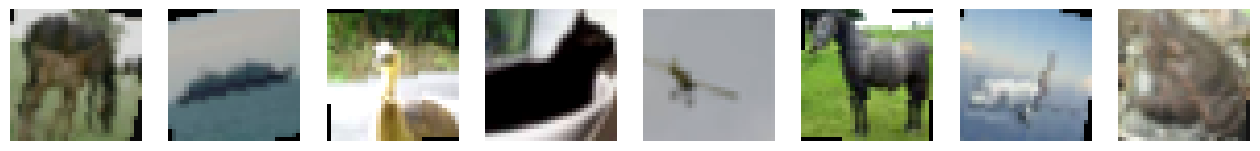

In [5]:
# Plot images
fig, axes = plt.subplots(1, 8, figsize=(16, 2))
for idx in range(8):
    axes[idx].imshow(images[idx].permute(1, 2, 0))
    axes[idx].axis('off')
plt.show()
